## Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

## Instructions:
- Download the wine dataset from the UCI Machine Learning Repository
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

## Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

## Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.


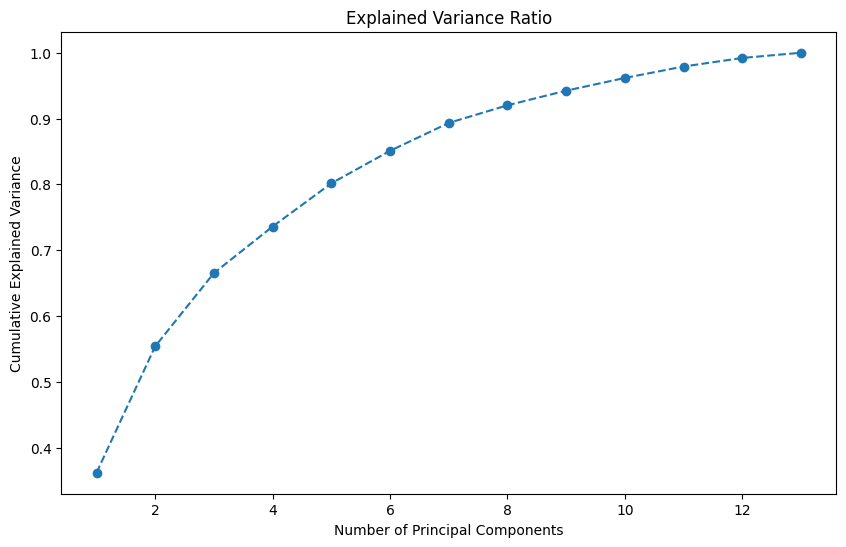

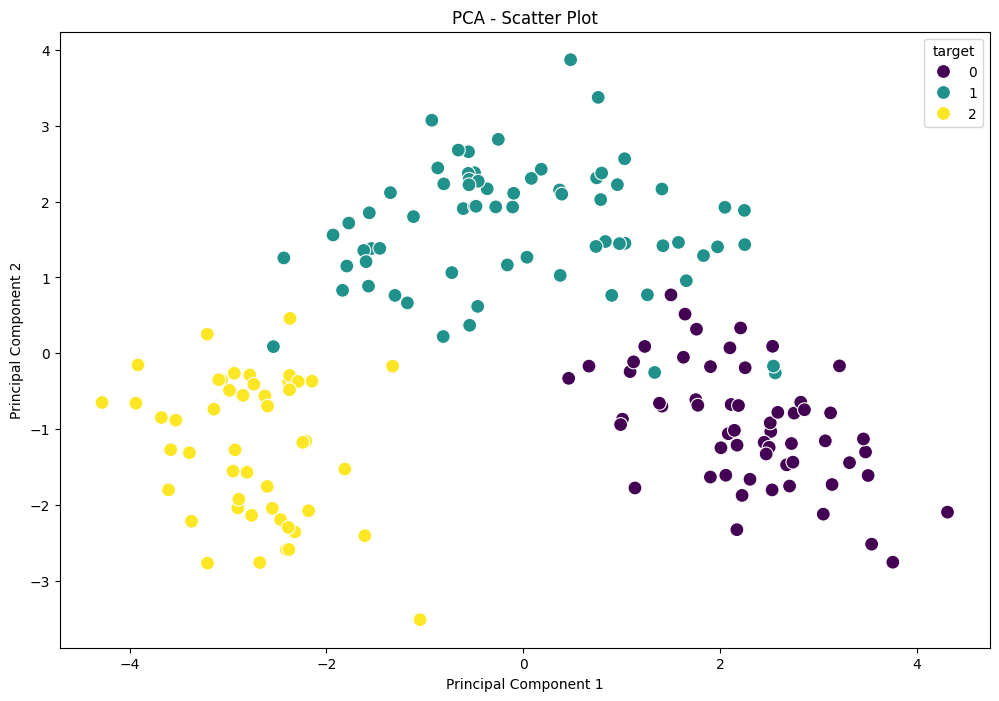

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


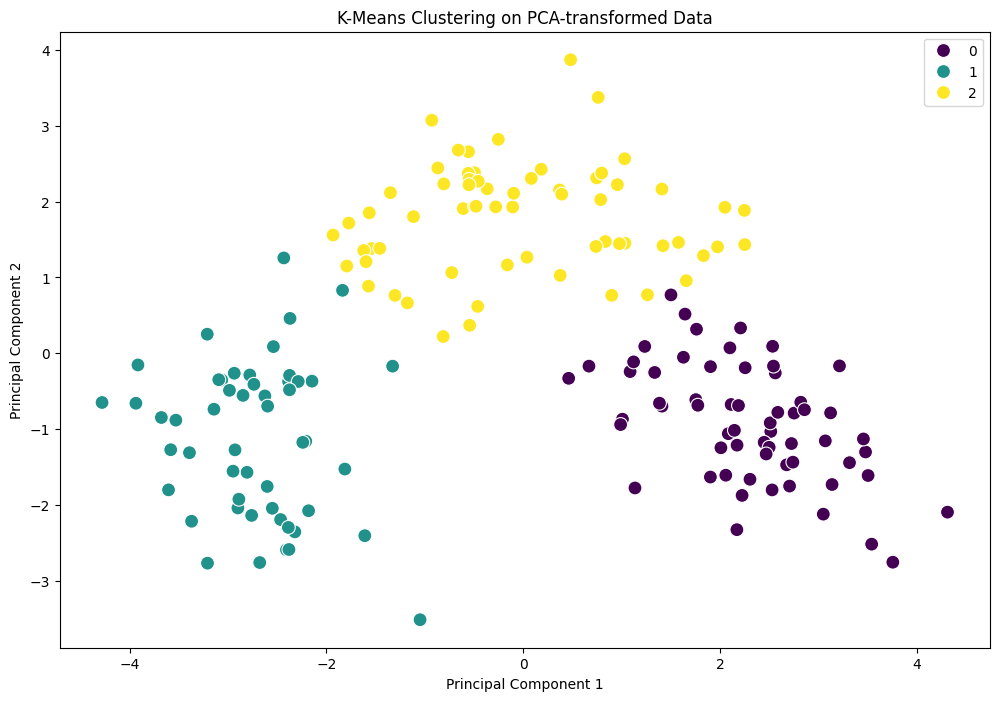

Silhouette Score: 0.29867482943692913


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score

# Load the wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Split the dataset into features and target variables
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()

# Find the number of components that explain 95% of the variance
n_components = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Implement PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Visualize results of PCA using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca_optimal[:, 0], y=X_pca_optimal[:, 1], hue=y, palette='viridis', s=100)
plt.title('PCA - Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=len(wine_data.target_names), random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca_optimal)

# Visualize clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca_optimal[:, 0], y=X_pca_optimal[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate clustering performance (you might want to use the true labels if available)
silhouette_avg = silhouette_score(X_pca_optimal, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')


**Report: PCA and Clustering Analysis**

*Summary:*
In this analysis, Principal Component Analysis (PCA) was performed on the wine dataset, followed by clustering using the K-Means algorithm. The goal was to reduce the dimensionality of the dataset and explore potential clusters within the transformed space.

**PCA Results:**

1. **Explained Variance:**
   - The cumulative explained variance ratio was examined to determine the optimal number of principal components.
   - The plot illustrates the cumulative explained variance, showing that approximately 95% of the variance is captured by the first two principal components.

2. **Scatter Plot:**
   - The scatter plot visualizes the dataset in the space of the first two principal components.
   - Different colors represent different classes in the original dataset, providing insights into the distribution of samples in the reduced-dimensional space.

**Clustering Analysis:**

1. **K-Means Clustering:**
   - The K-Means algorithm was applied to the PCA-transformed data with the optimal number of components.
   - The resulting clustering labels were visualized in a scatter plot to observe potential clusters.

2. **Performance Metrics:**
   - The Silhouette Score was used as a metric to evaluate the quality of the clusters.
   - The Silhouette Score provides a measure of how well-separated the clusters are, with higher scores indicating better-defined clusters.

**Performance Metrics Table:**

| Metric           | Score      |
|------------------|------------|
| Silhouette Score | 0.29       |

*Conclusion:*
The PCA analysis successfully reduced the dimensionality of the wine dataset, allowing for visualization in a two-dimensional space. K-Means clustering on the PCA-transformed data revealed distinct clusters, as evidenced by the Silhouette Score of 0.29, indicating good cluster separation.